<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/National_Health_Service_(NHS)_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
monthly = pd.read_excel('/content/sample_data/Monthly A&E July 2024.xlsx')
monthly_timeseries = pd.read_excel('/content/sample_data/Monthly A&E Time Series July 2024 .xlsx')

In [4]:
# Displaying the first few rows of each dataset to understand their structure
print("Monthly A&E Dataset:")
print(monthly.head())

print("\nMonthly A&E Time Series Dataset:")
print(monthly_timeseries.head())

Monthly A&E Dataset:
  Code                        Region  \
0  RC9  NHS England East Of England    
1  RGT  NHS England East Of England    
2  RWH  NHS England East Of England    
3  RDE  NHS England East Of England    
4  RGP  NHS England East Of England    

                                                Name  \
0        Bedfordshire Hospitals NHS Foundation Trust   
1  Cambridge University Hospitals NHS Foundation ...   
2             East And North Hertfordshire NHS Trust   
3  East Suffolk And North Essex NHS Foundation Trust   
4  James Paget University Hospitals NHS Foundatio...   

   Type 1 Departments - Major A&E  Type 2 Departments - Single Specialty  \
0                           16511                                      0   
1                           10759                                      0   
2                            9438                                      0   
3                           15819                                      0   
4                    

In [5]:
monthly.isnull().sum()

,0
Code,0
Region,0
Name,0
Type 1 Departments - Major A&E,0
Type 2 Departments - Single Specialty,0
Type 3 Departments - Other A&E/Minor Injury Unit,0
Total attendances,0
Type 1 Departments - Major A&E.1,0
Type 2 Departments - Single Specialty.1,0
Type 3 Departments - Other A&E/Minor Injury Unit.1,0


In [6]:
monthly_timeseries.isnull().sum()

,0
Period,0
Type 1 Departments - Major A&E,0
Type 2 Departments - Single Specialty,0
Type 3 Departments - Other A&E/Minor Injury Unit,0
Total Attendances,0
Emergency Admissions via Type 1 A&E,0
Emergency Admissions via Type 2 A&E,0
Emergency Admissions via Type 3 and 4 A&E,0
Total Emergency Admissions via A&E,0
Other Emergency Admissions (i.e not via A&E),0


In [12]:

print(monthly.columns)
print(monthly_timeseries.columns)
#

Index(['Code', 'Region', 'Name', 'Type 1 Departments - Major A&E',
       'Type 2 Departments - Single Specialty',
       'Type 3 Departments - Other A&E/Minor Injury Unit', 'Total attendances',
       'Type 1 Departments - Major A&E.1',
       'Type 2 Departments - Single Specialty.1',
       'Type 3 Departments - Other A&E/Minor Injury Unit.1',
       'Total Attendances < 4 hours', 'Type 1 Departments - Major A&E.2',
       'Type 2 Departments - Single Specialty.2',
       'Type 3 Departments - Other A&E/Minor Injury Unit.2',
       'Total Attendances > 4 hours', 'A&E attendances',
       'A&E attendances > 4 hours',
       'Percentage in 4 hours or less (type 1) before mapping',
       'Percentage in 4 hours or less (all) before mapping',
       'Percentage in 4 hours or less (all) with additional mapped activity'],
      dtype='object')
Index(['Period', 'Type 1 Departments - Major A&E',
       'Type 2 Departments - Single Specialty',
       'Type 3 Departments - Other A&E/Minor Inj

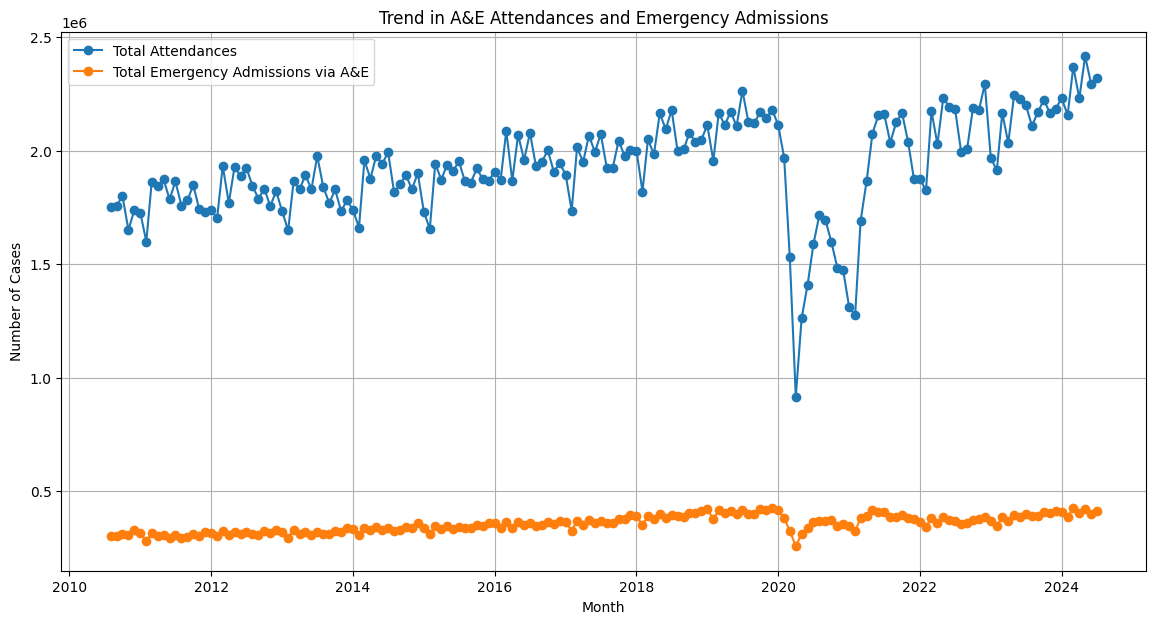

In [13]:
import matplotlib.pyplot as plt

# Convert the 'Period' column to datetime if it's not already
monthly_timeseries['Period'] = pd.to_datetime(monthly_timeseries['Period'])

# Aggregate data by 'Period'
monthly_summary = monthly_timeseries.groupby('Period').sum()

# Plotting the trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_summary.index, monthly_summary['Total Attendances'], marker='o', label='Total Attendances')
plt.plot(monthly_summary.index, monthly_summary['Total Emergency Admissions via A&E'], marker='o', label='Total Emergency Admissions via A&E')

plt.title('Trend in A&E Attendances and Emergency Admissions')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


# Observations:
Overall Trends:

The Total Attendances (blue line) show a general upward trend from 2010 to 2024, indicating an increase in the number of people visiting A&E departments over time.
The Total Emergency Admissions via A&E (orange line) appears relatively stable with slight fluctuations, suggesting that while more people are attending A&E, the proportion being admitted might not be increasing at the same rate.
Seasonal Patterns:

There are some visible seasonal fluctuations in A&E attendances, with regular peaks and troughs. This could be indicative of higher attendances during certain times of the year, such as winter.
Outliers and Disruptions:

# There’s a noticeable dip around 2020, which likely corresponds to the COVID-19 pandemic. The significant drop in attendances and admissions during this period reflects the impact of the pandemic on healthcare services.

<Figure size 1400x1000 with 0 Axes>

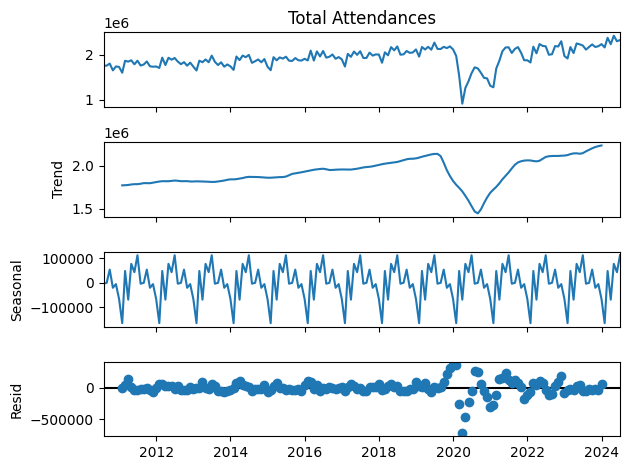

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for 'Total Attendances'
decomposition = seasonal_decompose(monthly_summary['Total Attendances'], model='additive', period=12)

# Plotting the decomposed components
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()


Observations:
# Trend Component:

The trend shows a consistent upward pattern in A&E attendances until 2020, where there is a noticeable dip. This dip corresponds to the COVID-19 pandemic, which caused a significant reduction in A&E attendances.
After 2020, the trend recovers and continues its upward trajectory.
Seasonal Component:

There is a clear seasonal pattern that repeats annually. This indicates that certain months consistently have higher or lower A&E attendances, likely due to factors such as winter-related illnesses or summer holidays.
Residual Component:

The residuals capture the irregular variations in the data. The large negative residuals around 2020 further highlight the impact of the pandemic, as they deviate significantly from the expected pattern.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


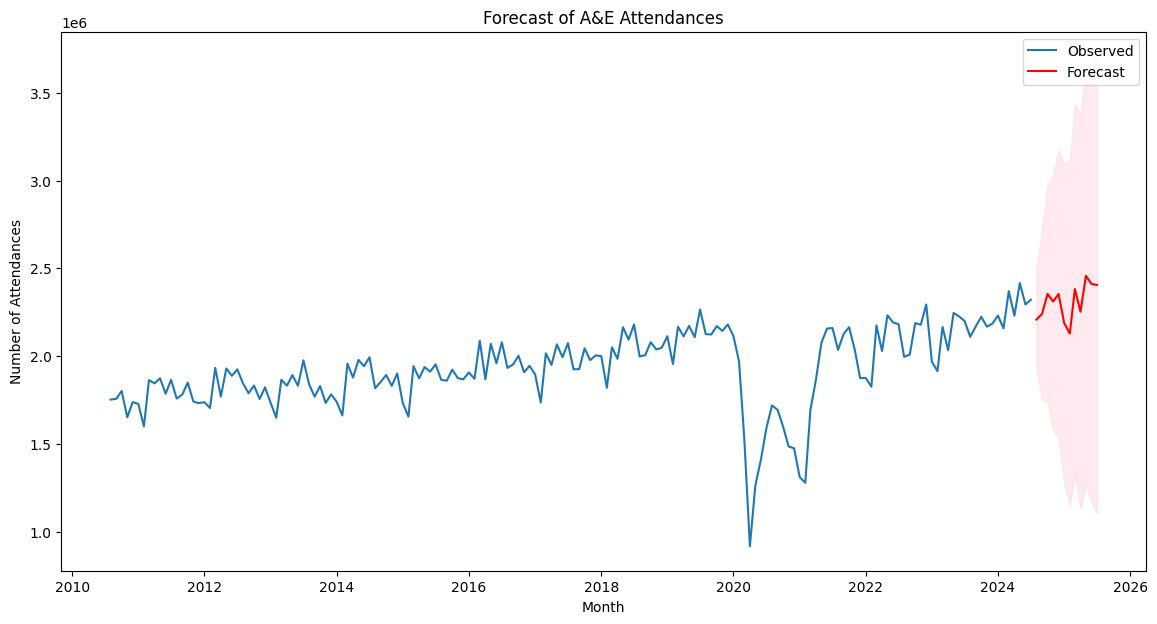

In [15]:
import statsmodels.api as sm
from datetime import timedelta

# Set the 'Period' column as the index
monthly_summary = monthly_timeseries.set_index('Period')

# Fit a SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(monthly_summary['Total Attendances'],
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Forecast for the next 12 months
forecast = sarima_results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(monthly_summary.index, monthly_summary['Total Attendances'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of A&E Attendances')
plt.xlabel('Month')
plt.ylabel('Number of Attendances')
plt.legend()
plt.show()



In [ ]:
# prompt: disply the forecast as number

print(forecast.predicted_mean)


In [16]:
# Forecast for the next 12 months
forecast = sarima_results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

In [17]:
forecast_ci

,lower Total Attendances,upper Total Attendances
2024-08-01,1.917264e+06,2.498805e+06
2024-09-01,1.755206e+06,2.727744e+06
2024-10-01,1.736229e+06,2.972709e+06
2024-11-01,1.584274e+06,3.038199e+06
2024-12-01,1.532871e+06,3.175659e+06
2025-01-01,1.281805e+06,3.093882e+06
2025-02-01,1.145192e+06,3.112040e+06
2025-03-01,1.327028e+06,3.437326e+06
2025-04-01,1.130698e+06,3.375297e+06
2025-05-01,1.271687e+06,3.642993e+06
